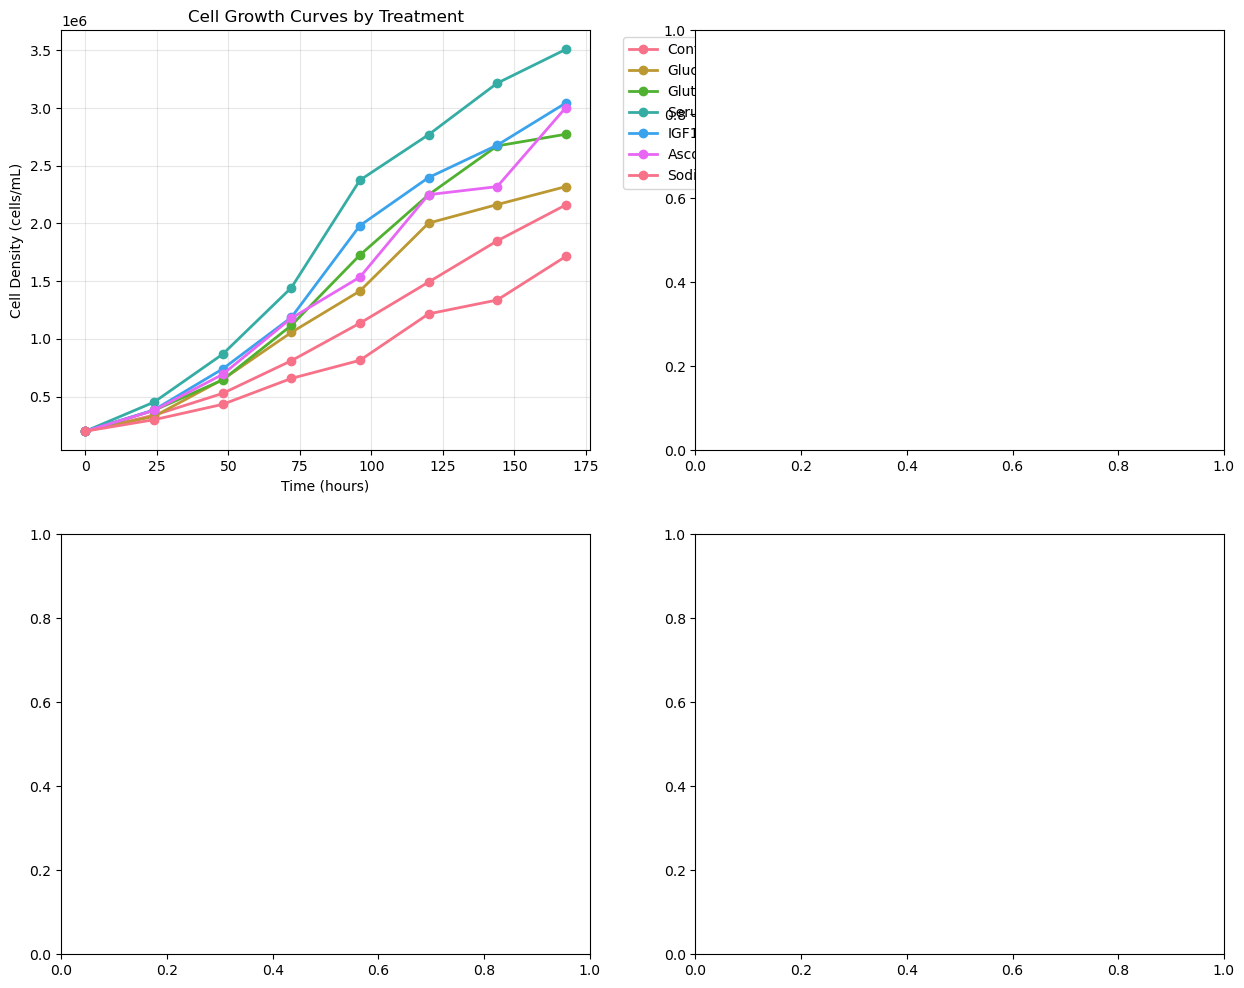

In [93]:
#Let's start by looking at how cell density changes over time for each treatment.

# Create a figure with subplots for better organization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Cell density over time
ax1 = axes[0, 0]
# Group data by treatment and calculate mean values for each time point
for treatment in data['Treatment'].unique():
    # Filter data for current treatment
    treatment_data = data[data['Treatment'] == treatment]
    # Group by time and calculate mean cell density
    time_means = treatment_data.groupby('Time_hours')['Cell_density_per_mL'].mean()
    # Plot the line
    ax1.plot(time_means.index, time_means.values, marker='o', label=treatment, linewidth=2)

ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Cell Density (cells/mL)')
ax1.set_title('Cell Growth Curves by Treatment')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

## Step 5: Create graphs to visualize our results


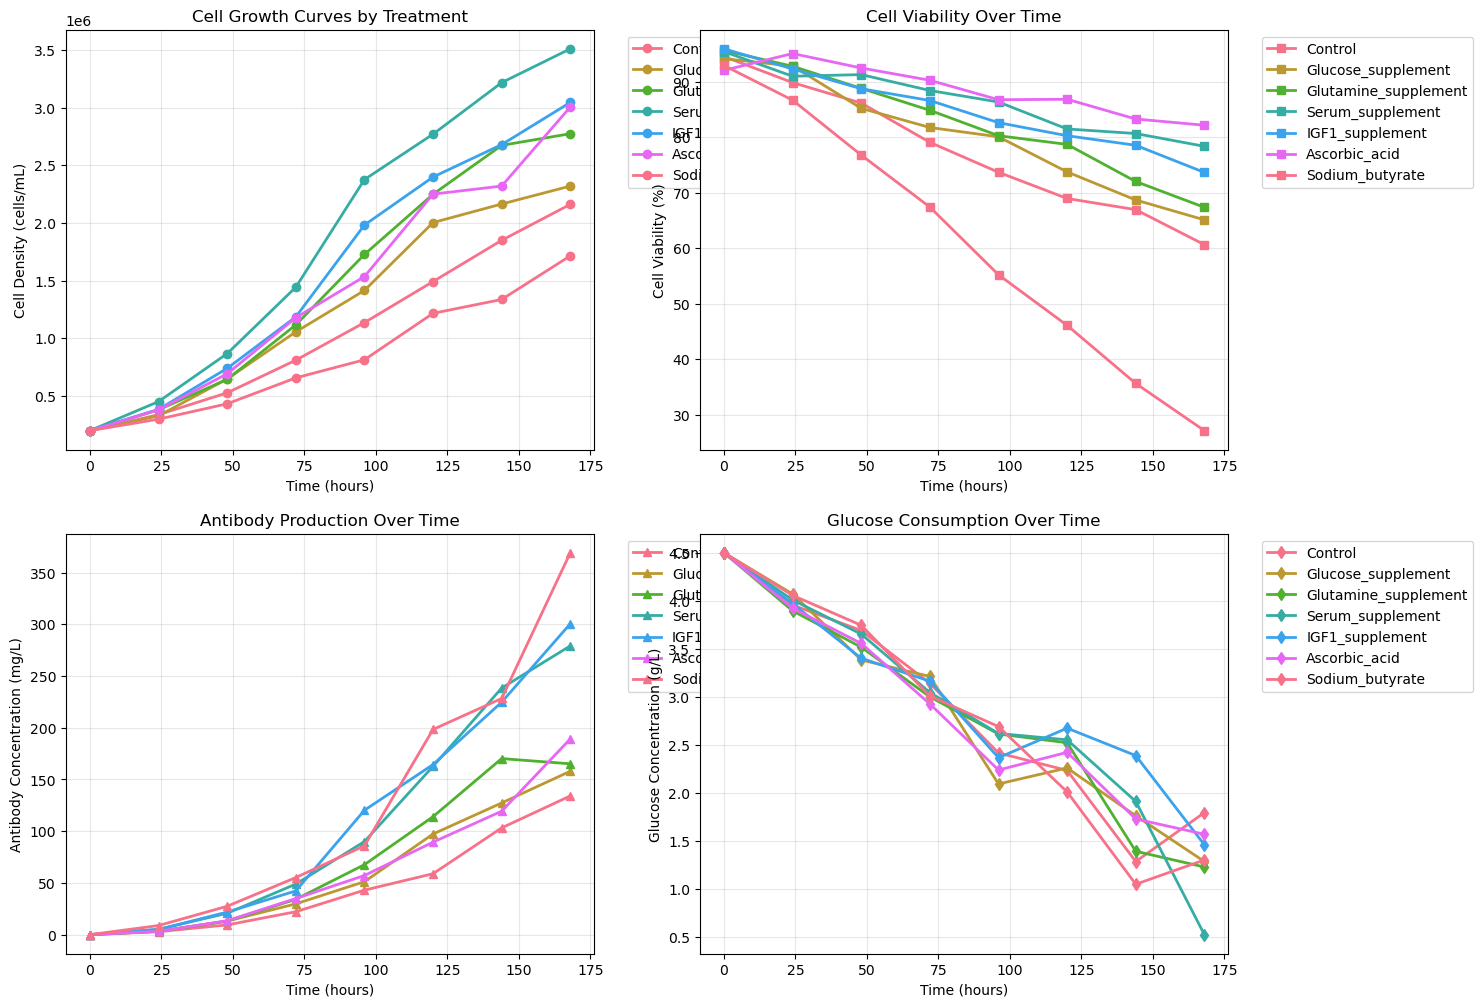

In [94]:
## Part 1: Visualizing Cell Growth Over Time
#Let's start by looking at how cell density changes over time for each treatment.


# Create a figure with subplots for better organization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Cell density over time
ax1 = axes[0, 0]
# Group data by treatment and calculate mean values for each time point
for treatment in data['Treatment'].unique():
    # Filter data for current treatment
    treatment_data = data[data['Treatment'] == treatment]
    # Group by time and calculate mean cell density
    time_means = treatment_data.groupby('Time_hours')['Cell_density_per_mL'].mean()
    # Plot the line
    ax1.plot(time_means.index, time_means.values, marker='o', label=treatment, linewidth=2)

ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Cell Density (cells/mL)') 
ax1.set_title('Cell Growth Curves by Treatment')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, alpha=0.3)

# Plot 2: Cell viability over time
ax2 = axes[0, 1]
for treatment in data['Treatment'].unique():
    treatment_data = data[data['Treatment'] == treatment]
    time_means = treatment_data.groupby('Time_hours')['Viability_percent'].mean()
    ax2.plot(time_means.index, time_means.values, marker='s', label=treatment, linewidth=2)

ax2.set_xlabel('Time (hours)')
ax2.set_ylabel('Cell Viability (%)')
ax2.set_title('Cell Viability Over Time')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)

# Plot 3: Antibody production over time
ax3 = axes[1, 0]
for treatment in data['Treatment'].unique():
    treatment_data = data[data['Treatment'] == treatment]
    time_means = treatment_data.groupby('Time_hours')['Antibody_mg_per_L'].mean()
    ax3.plot(time_means.index, time_means.values, marker='^', label=treatment, linewidth=2)

ax3.set_xlabel('Time (hours)')
ax3.set_ylabel('Antibody Concentration (mg/L)')
ax3.set_title('Antibody Production Over Time')
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.grid(True, alpha=0.3)

# Plot 4: Glucose consumption over time
ax4 = axes[1, 1]
for treatment in data['Treatment'].unique():
    treatment_data = data[data['Treatment'] == treatment]
    time_means = treatment_data.groupby('Time_hours')['Glucose_g_per_L'].mean()
    ax4.plot(time_means.index, time_means.values, marker='d', label=treatment, linewidth=2)

ax4.set_xlabel('Time (hours)')
ax4.set_ylabel('Glucose Concentration (g/L)')
ax4.set_title('Glucose Consumption Over Time')
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.grid(True, alpha=0.3)

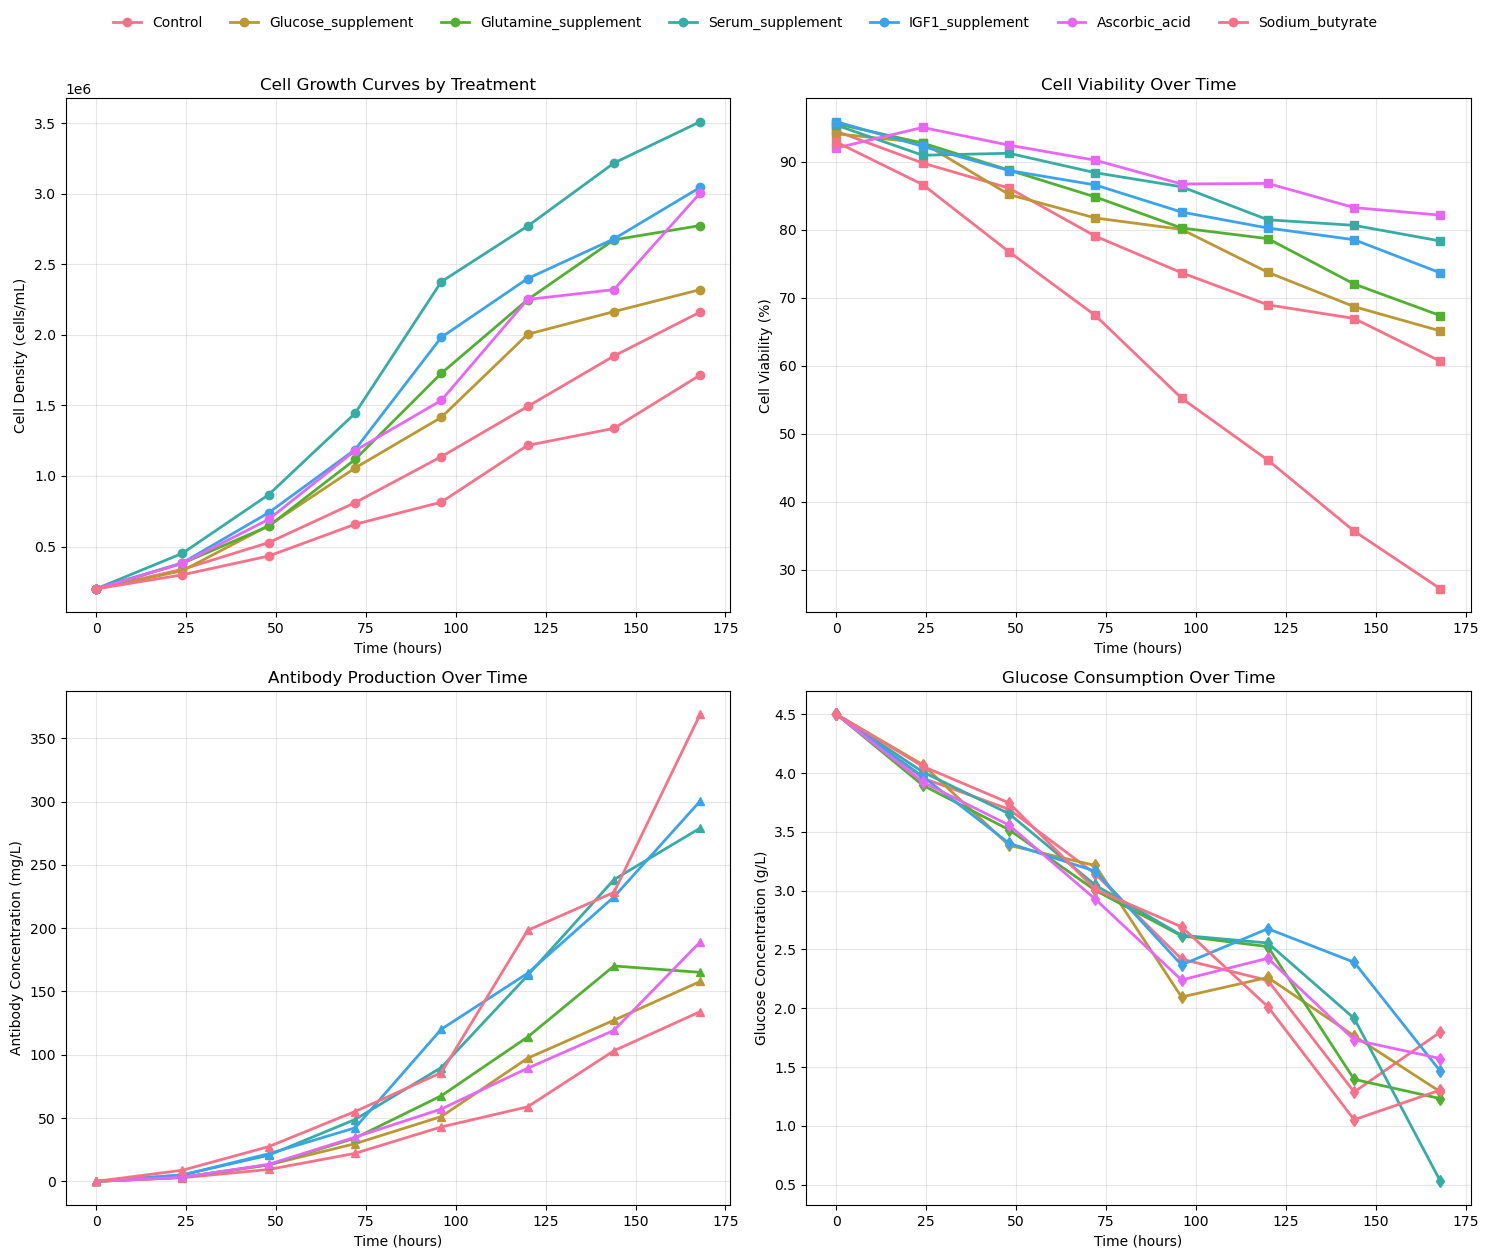

In [95]:
import matplotlib.pyplot as plt

# Helper function (no legend here)
def plot_metric(ax, data, y_col, ylabel, title, marker):
    for treatment in data['Treatment'].unique():
        treatment_data = data[data['Treatment'] == treatment]
        time_means = treatment_data.groupby('Time_hours')[y_col].mean()
        ax.plot(time_means.index, time_means.values, marker=marker,
                label=treatment, linewidth=2)
    ax.set_xlabel('Time (hours)')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.grid(True, alpha=0.3)

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Apply helper function for each metric
plot_metric(axes[0, 0], data, 'Cell_density_per_mL',
            'Cell Density (cells/mL)', 'Cell Growth Curves by Treatment', 'o')
plot_metric(axes[0, 1], data, 'Viability_percent',
            'Cell Viability (%)', 'Cell Viability Over Time', 's')
plot_metric(axes[1, 0], data, 'Antibody_mg_per_L',
            'Antibody Concentration (mg/L)', 'Antibody Production Over Time', '^')
plot_metric(axes[1, 1], data, 'Glucose_g_per_L',
            'Glucose Concentration (g/L)', 'Glucose Consumption Over Time', 'd')

# Add one legend for the whole figure
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05),
           ncol=len(labels), frameon=False)

plt.tight_layout()
plt.show()


## Change color

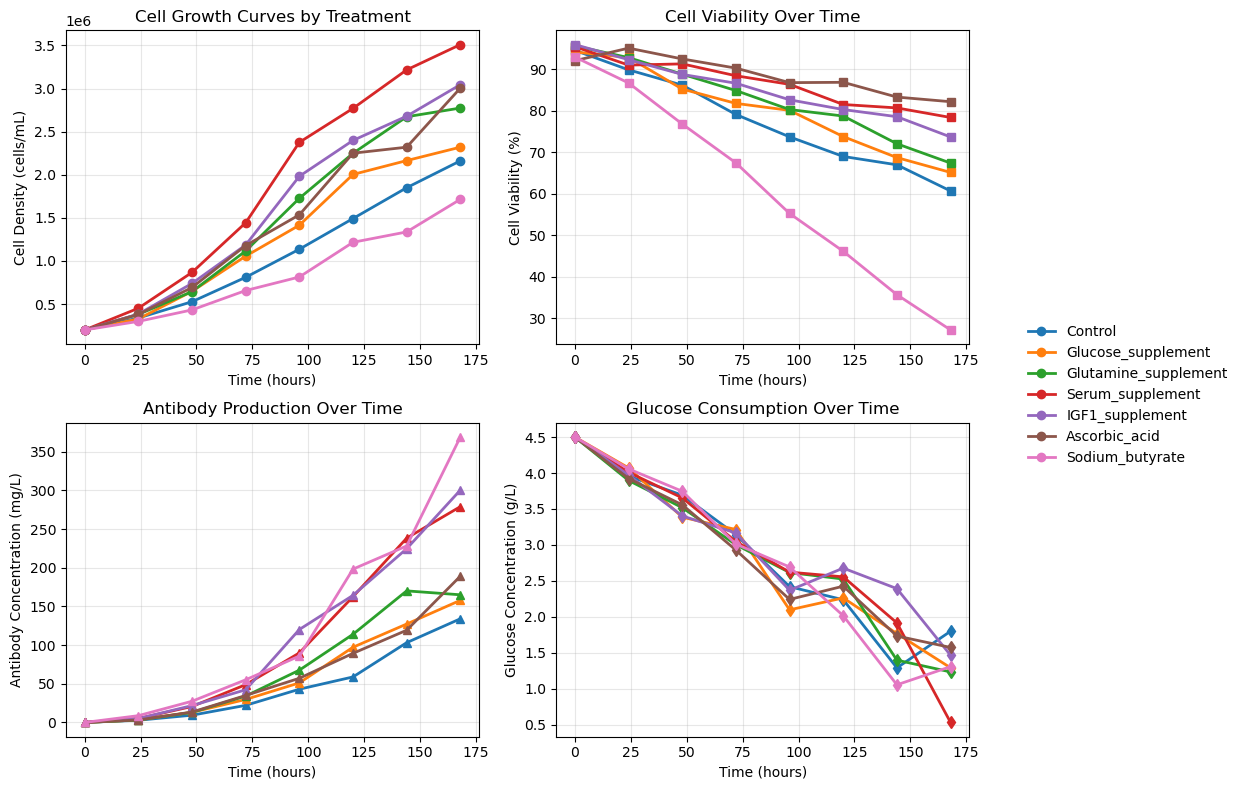

In [19]:
import matplotlib.pyplot as plt

# Choose a custom palette (example: tab10)
palette = plt.cm.tab10.colors   # tuple of 10 RGB colors
treatments = None               # we’ll fill this later

# Helper function (no legend inside)
def plot_metric(ax, data, y_col, ylabel, title, marker, palette):
    global treatments
    if treatments is None:
        treatments = list(data['Treatment'].unique())
    for i, treatment in enumerate(treatments):
        treatment_data = data[data['Treatment'] == treatment]
        time_means = treatment_data.groupby('Time_hours')[y_col].mean()
        ax.plot(time_means.index, time_means.values,
                marker=marker, label=treatment, linewidth=2,
                color=palette[i % len(palette)])
    ax.set_xlabel('Time (hours)')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.grid(True, alpha=0.3)

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Apply helper function for each metric
plot_metric(axes[0, 0], data, 'Cell_density_per_mL',
            'Cell Density (cells/mL)', 'Cell Growth Curves by Treatment', 'o', palette)
plot_metric(axes[0, 1], data, 'Viability_percent',
            'Cell Viability (%)', 'Cell Viability Over Time', 's', palette)
plot_metric(axes[1, 0], data, 'Antibody_mg_per_L',
            'Antibody Concentration (mg/L)', 'Antibody Production Over Time', '^', palette)
plot_metric(axes[1, 1], data, 'Glucose_g_per_L',
            'Glucose Concentration (g/L)', 'Glucose Consumption Over Time', 'd', palette)

# Grab handles/labels from one axis
handles, labels = axes[0, 0].get_legend_handles_labels()

# Put legend on the right
fig.legend(handles, labels, loc='center left',
           bbox_to_anchor=(1.02, 0.5), frameon=False)

plt.tight_layout()
plt.show()


In [97]:
# 1) Make a safe copy name in Python and push it to R
%load_ext rpy2.ipython
df_r = data.copy()     # <-- your pandas DataFrame named 'data'

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


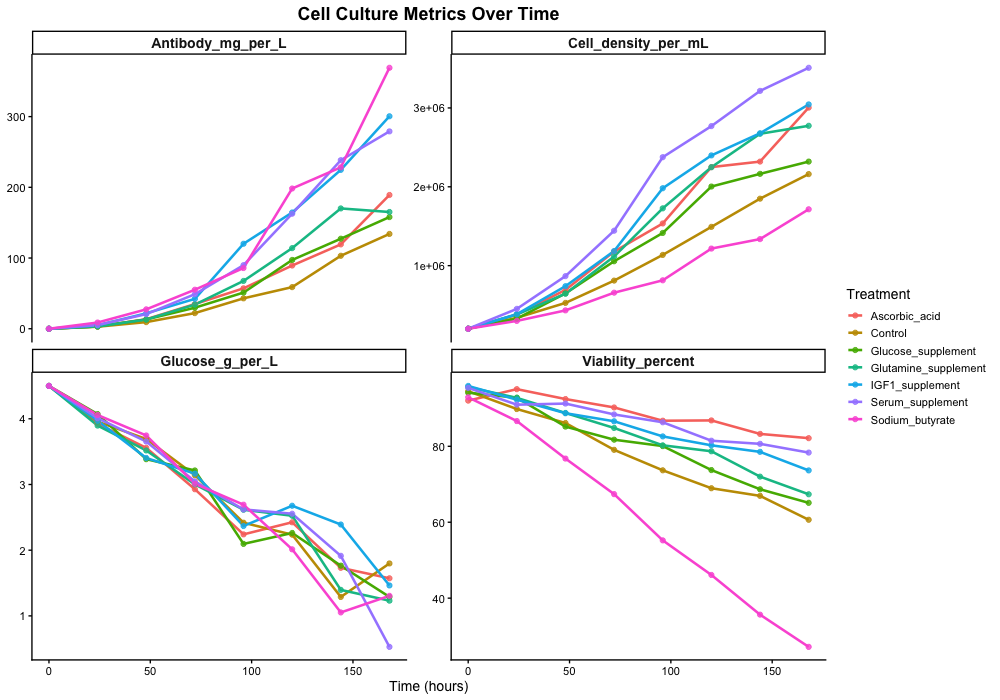

In [98]:
%%R -i df_r -w 1000 -h 700 -u px
library(ggplot2)
library(dplyr)
library(tidyr)

# (optional) ensure Time_hours is numeric for correct ordering
if (!is.numeric(df_r$Time_hours)) {
  df_r$Time_hours <- as.numeric(df_r$Time_hours)
}

# Match your matplotlib logic: mean per Treatment × Time_hours for each metric
plot_df <- df_r %>%
  pivot_longer(
    cols = c(Cell_density_per_mL, Viability_percent, Antibody_mg_per_L, Glucose_g_per_L),
    names_to = "Metric", values_to = "Value"
  ) %>%
  group_by(Treatment, Time_hours, Metric) %>%
  summarise(Value = mean(Value, na.rm = TRUE), .groups = "drop")

p <- ggplot(plot_df, aes(x = Time_hours, y = Value, color = Treatment)) +
  geom_line(linewidth = 1.2) +
  geom_point(size = 2, alpha = 0.8) +
  facet_wrap(~ Metric, scales = "free_y") +
  labs(
    x = "Time (hours)", y = NULL,
    title = "Cell Culture Metrics Over Time",
    color = "Treatment"
  ) +
  theme_classic(base_size = 14) +
  theme(
    legend.position = "right",
    strip.text = element_text(size = 14, face = "bold"),
    plot.title = element_text(hjust = 0.5, size = 18, face = "bold")
  )

print(p)
